In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [4]:
np.random.seed(42)
data=np.random.normal(loc=50, scale=10, size=100)
outl=np.array([10,110,5,120])
data=np.concatenate([data, outl])

In [5]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


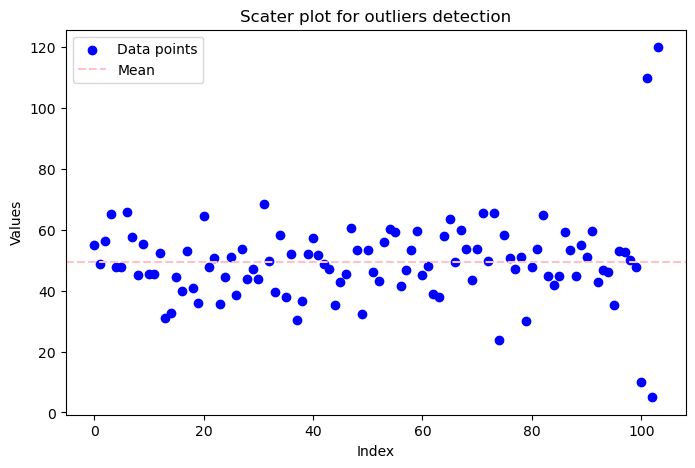

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='pink',linestyle='--',label='Mean')
plt.xlabel('Index')
plt.ylabel("Values")
plt.title("Scater plot for outliers detection")
plt.legend()
plt.show()

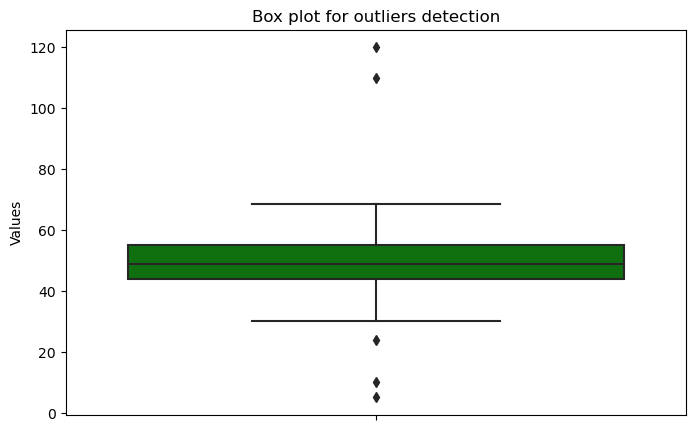

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values',color='green')
plt.title('Box plot for outliers detection')
plt.show()

**Z-Score Method**

the Z-score formula is:

z=x-M/sd

where:

x=data point

m=mean of the dataset

sd=standard deviation of the dataset

steps:

1.Compute the Z-score for each data point

2.if Z-score > 3 or Z-score <-3, mark it as an outlies.

In [14]:
df['Z-score']=zscore(df['Values'])
df['outlier_Z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x)>3 else 'Normal')
print(df[df['outlier_Z']=='Outlier'])

     Values   Z-score outlier_Z
101   110.0  4.328173   Outlier
102     5.0 -3.175368   Outlier
103   120.0  5.042796   Outlier


**Interquartile Range(IQR) Method**The IQR formula is:

IQR = Q3 - Q1.

steps:

1.Calculate Q1(25th percentile) and Q3(75th percentile).

2.Compute IQR = Q3 - Q1.

3.Define lower & upper bounds:

   **Lower bound=Q1-1.5xIQR**

   **Upper bound=Q3+1.5xIQR**
    
4.Any value outside these bounds is an outlier.

In [18]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1

#Defining bounds
lowerB = Q1 - 1.5 * IQR
upperB = Q3 + 1.5 * IQR

#Identifying outliers
df['outliers_IQR'] = df['Values'].apply(lambda x: 'Outlier' if (x < lowerB or x > upperB) else 'Normal') 
print(df[df['outliers_IQR'] == 'Outlier'])

         Values   Z-score outlier_Z outliers_IQR
74    23.802549 -1.831694    Normal      Outlier
100   10.000000 -2.818056    Normal      Outlier
101  110.000000  4.328173   Outlier      Outlier
102    5.000000 -3.175368   Outlier      Outlier
103  120.000000  5.042796   Outlier      Outlier


**Final Summary**

1.Scatter Plot - Outliers appear far from the main cluster.

2.Box Plot-Outliers are outside the whiskers.

3.Z-Score Values with Z > 3 or Z-3 are outliers.

4.IQR Method - Values outside [Q1-1.5xIQR, Q3+ 1.5xIQR) are outliers.

Finding Outliers Using the IQR Method with a 5-Number Summary The 5-number summary consists of:

Minimum (Q0) The smallest value in the dataset.

First Quartile (Q1) - The 25th percentile (lower quartile).

Median (Q2)- The 50th percentile (middle value).

Third Quartile (Q3) The 75th percentile (upper quartile).

Maximum (Q4) The largest value in the dataset.

The Interquartile Range (IQR) is calculated as:

IQR-Q3-Q1

Any value outside the range:

[Q1-1.5xIQR,Q3+1.5xIQR] is considered an outlier.

In [26]:
#Step 1: Create a dataset
np.random.seed(42)
data = np.random.normal(loc=50, scale=10,size=100)
outliers = np.array([10, 110, 5, 120])
data = np.concatenate((data, outliers))

#Step 2: Compute the 5-number summary
Q1 = np.percentile(data, 25)  #First Quartile (25th percentile)
Q2 = np.median(data)          #Median (Seth percentile)
Q3 = np.percentile(data, 75)   #Third Quartile (75th percentile)
min_value = np.min(data)
max_value = np.max(data)

#Step 3: Compute IOR
IQR = Q3 - Q1

#Step 4: Compute Outlier Boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Step 5: Find Outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

#Step 6: Print Results
print(f"S-Number Summary:\nMin: {min_value}, Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}, Max: {max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers:{outliers}")

S-Number Summary:
Min: 5.0, Q1: 43.874401021766715, Median (Q2): 48.73043708220287, Q3: 55.00852473036764, Max: 120.0
IQR: 11.134123708600924
Lower Bound: 27.17321545886533, Upper Bound: 71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
